# Principal Component Analysis (PCA) for Dimensionality Reduction: Demonstrate the eigenvectors estimated for synthetic 2-D data distributed in different ways

# Theory

Let $X_\text{raw}$ be the $n \times p$ data matrix with $n$ rows (data points) and $p$ columns (variables, or features). After subtracting the mean vector $\mu$ from each row, we get the centered data matrix $X$. Let $V$ be the $p \times k$ matrix of some $k$ eigenvectors that we want to use; these would most often be the $k$ eigenvectors with the largest eigenvalues. Then the $n \times k$ matrix of PCA projections ("scores") will be simply given by:
$$Z = XV$$
In order to be able to reconstruct the original two variables from this one principal component, we can map it back to $p$ dimensions with $V^\top$. Indeed, the values of each PC should be placed on the same vector as was used for projection. The result is then given by:
$$\hat{X} = ZV^\top = XVV^\top$$
To get the final reconstruction $\hat{X}_\text{raw}$, we need to add the mean vector $\mu$ to that:
$$
\text{PCA reconstruction} = \text{PC scores} \cdot \text{Eigenvectors}^\top + \text{Mean}
$$
$$
\hat{X}_\text{raw} = \hat{X} + \mu
$$
 $VV^\top$  is called a projection matrix. If all $p$ eigenvectors are used, then $VV^\top$ is the identity matrix (no dimensionality reduction is performed, hence "reconstruction" is perfect). If only a subset of eigenvectors is used, it is not identity. To check the accuracy of the reconstructed data, we have used the MSE metric.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [10]:
np.random.seed(12)

In [49]:
def analyze(data, title, n_comp):
    # Compute PCA
    pca = PCA(n_components=n_comp)
    pca.fit(data)

    # Get eigenvectors
    eigenvectors = pca.components_
    explained_variance_ratio = pca.explained_variance_ratio_

    print(f"\n The explained variances are : {explained_variance_ratio}")
    for idx, eigenvector in enumerate(eigenvectors):
        print(f" Eigenvector {idx+1} : {eigenvector}")

    print()
    # Plot data and eigenvectors
    plt.scatter(data[:, 0], data[:, 1], s=5)
    plt.quiver(np.mean(data[:, 0]), np.mean(data[:, 1]), eigenvectors[0, 0], eigenvectors[0, 1], angles='xy', scale_units='xy', scale=1, color='red')
    plt.quiver(np.mean(data[:, 0]), np.mean(data[:, 1]), eigenvectors[1, 0], eigenvectors[1, 1], color='g', angles='xy', scale_units='xy', scale=1)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'{title}')
    plt.show()
    return

In [50]:
def reconstruct(X, title):
  mu = np.mean(X, axis = 0)
  pca = PCA()
  pca.fit(X)

  nComp = 1
  X_reconstructed = np.dot(pca.transform(X)[:,:nComp], pca.components_[:nComp,:])
  X_reconstructed += mu
  r = 10

  print(f'\nMSE for reconstruction using 1st principal component : {np.mean(np.linalg.norm(X - X_reconstructed)**2)}\n')

  # create a legend for the plot
  plt.scatter(X[:, 0], X[:, 1], s = 5, label = 'Original data')
  plt.scatter(X_reconstructed[:, 0], X_reconstructed[:, 1], s = 5,  label = 'Reconstructed data')
  plt.legend()
  plt.title(f'PCA reconstruction in {title}, using 1st principal component')
  plt.show()

  return

# 2-D Gaussian dataset


 The explained variances are : [0.50949583 0.49050417]
 Eigenvector 1 : [-0.99969311 -0.02477253]
 Eigenvector 2 : [ 0.02477253 -0.99969311]



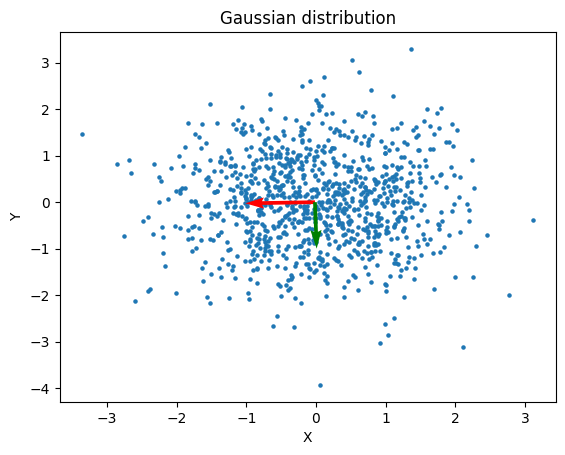


MSE for reconstruction using 1st principal component : 975.4332863340964



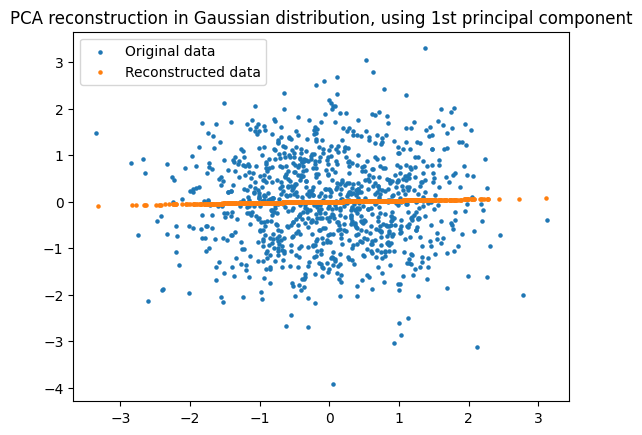

In [51]:
mean = [0, 0]
cov = [[1, 0], [0, 1]]
gauss_data = np.random.multivariate_normal(mean, cov, 1000)
analyze(gauss_data, 'Gaussian distribution', 2)
reconstruct(gauss_data, 'Gaussian distribution')

# Linearly distributed data


 The explained variances are : [1.00000000e+00 1.70038682e-33] 



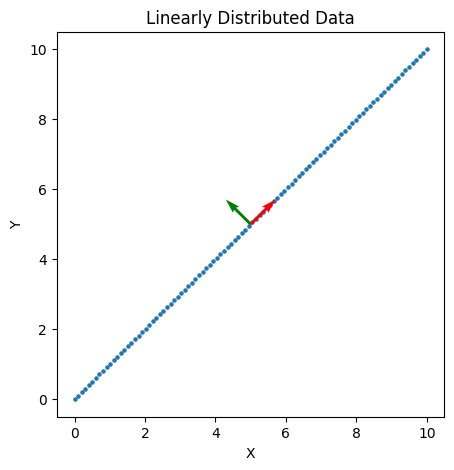


MSE for reconstruction using 1st principal component : 2.435800637864313e-29



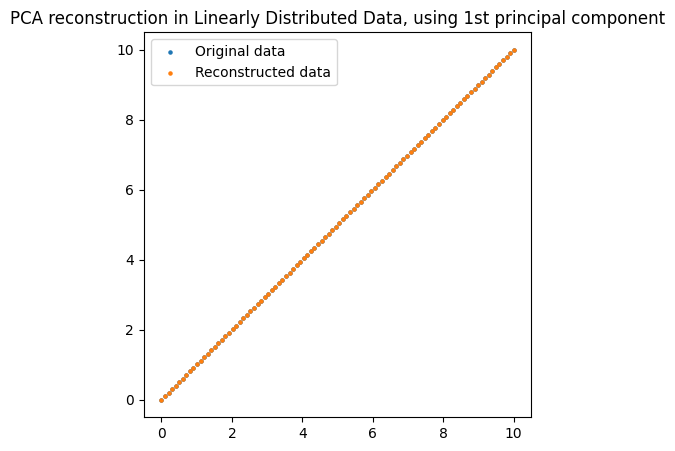

In [25]:
linear_data = np.linspace(0, 10, 100)
linear_data = np.column_stack((linear_data, linear_data))
analyze(linear_data, 'Linearly Distributed Data', 2)
reconstruct(linear_data, 'Linearly Distributed Data')

# Perturbed Linearly Distributed Data



 The explained variances are : [0.98215759 0.01784241]
 Eigenvector 1 : [0.69181484 0.72207495]
 Eigenvector 2 : [-0.72207495  0.69181484]



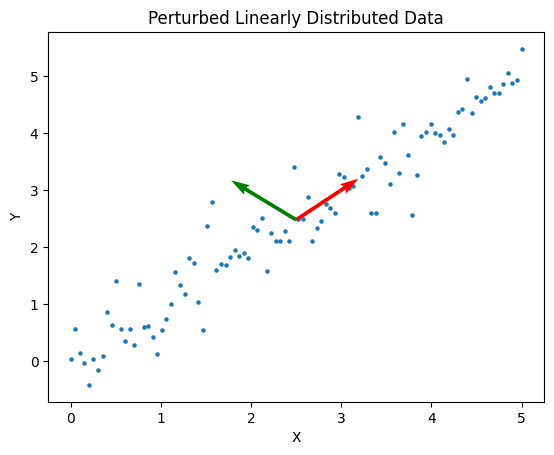


MSE for reconstruction using 1st principal component : 7.910912108913544



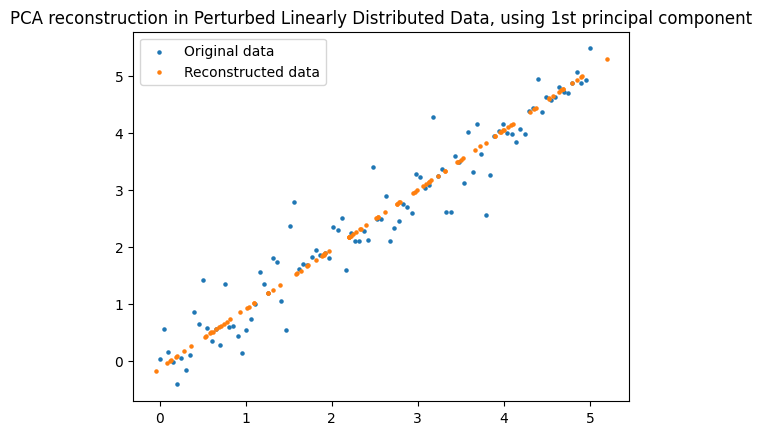

In [52]:
linear_data = np.linspace(0, 5, 100)
perturbation = np.random.randn(100)
perturbed_data = np.column_stack((linear_data, linear_data + 0.4*perturbation))

analyze(perturbed_data, 'Perturbed Linearly Distributed Data', 2)
reconstruct(perturbed_data, 'Perturbed Linearly Distributed Data')

# Two Gaussian Clusters


 The explained variances are : [0.88252915 0.11747085]
 Eigenvector 1 : [0.31387179 0.94946537]
 Eigenvector 2 : [-0.94946537  0.31387179]



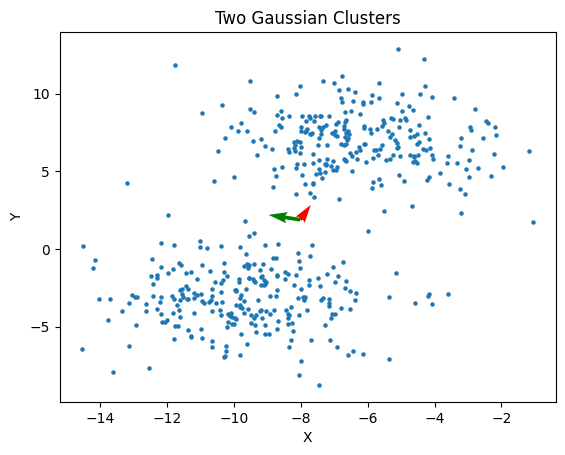


MSE for reconstruction using 1st principal component : 2136.7708989732873



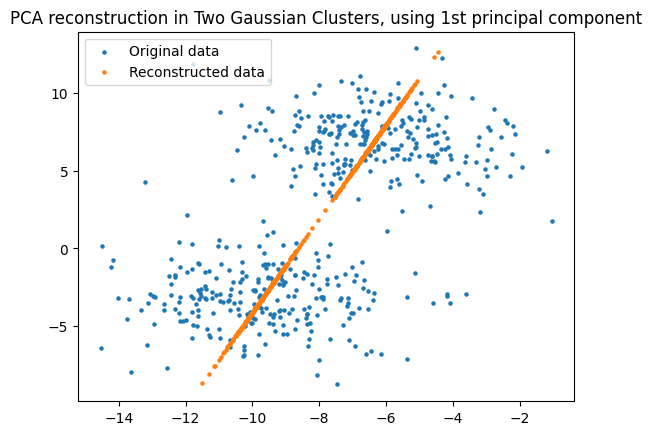

In [53]:
from sklearn.datasets import make_blobs
Gauss_2, _ = make_blobs(n_samples=500, centers=2, n_features=2, cluster_std=2)

analyze(Gauss_2, 'Two Gaussian Clusters', 2)
reconstruct(Gauss_2, 'Two Gaussian Clusters')

# Spiral Dataset


 The explained variances are : [0.52404556 0.47595444]
 Eigenvector 1 : [ 0.7606348  -0.64918002]
 Eigenvector 2 : [-0.64918002 -0.7606348 ]



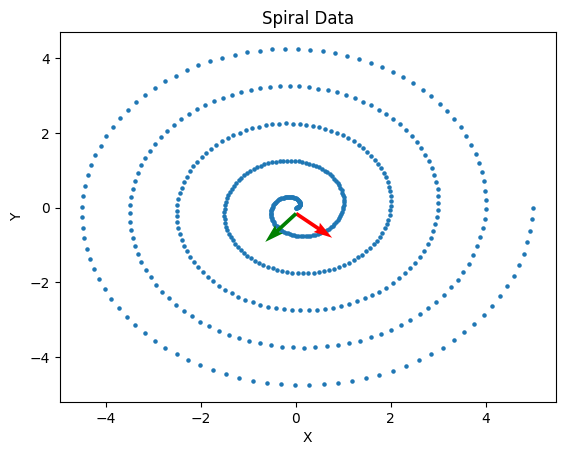


MSE for reconstruction using 1st principal component : 1979.1246974136861



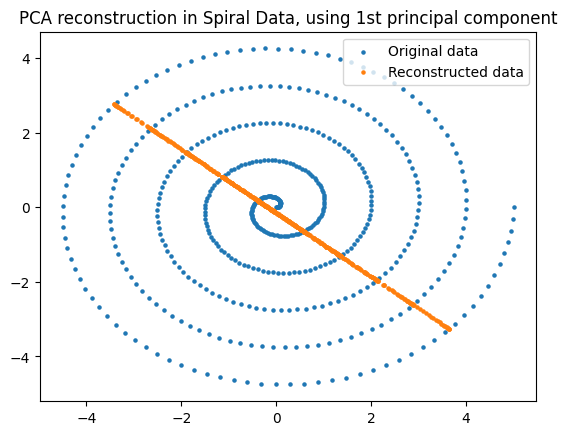

In [54]:
theta = np.linspace(0, 10 * np.pi, 500)
r = theta / (2 * np.pi)
spiral_data = np.column_stack((r * np.cos(theta), r * np.sin(theta)))
analyze(spiral_data, 'Spiral Data', 2)
reconstruct(spiral_data, 'Spiral Data')

# Elliptical Dataset


 The explained variances are : [0.96168582 0.03831418]
 Eigenvector 1 : [-1. -0.]
 Eigenvector 2 : [0. 1.]



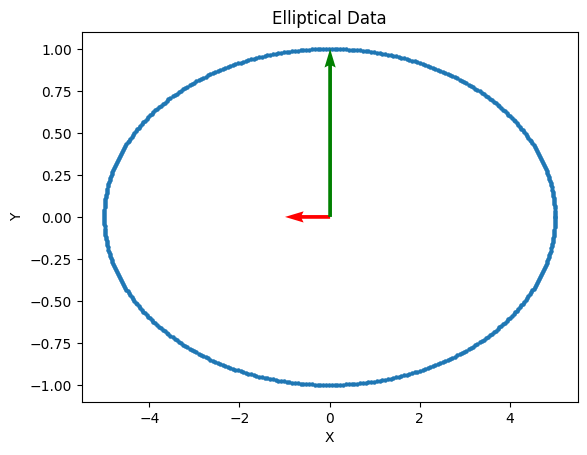


MSE for reconstruction using 1st principal component : 249.50000000000006



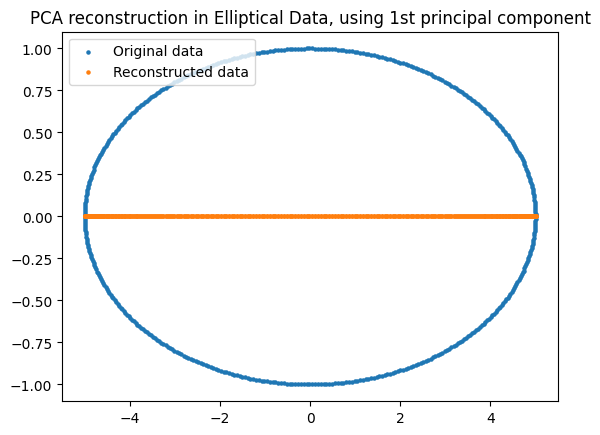

In [55]:
theta = np.linspace(0, 2 * np.pi, 500)
ellipse_data = np.column_stack((5 * np.cos(theta), 1 * np.sin(theta)))
analyze(ellipse_data, 'Elliptical Data', 2)
reconstruct(ellipse_data, 'Elliptical Data')